# LambdaConf 2015 Pre-Conference Survey - Data Mining

In [1]:
#imports
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.manifold import Isomap
from sklearn import preprocessing
import seaborn as sns; sns.set()

iso = Isomap(n_components=2)

--- 

## * Clustering

In [2]:
#load data
survey = pd.DataFrame.from_csv('../data/survey.csv', index_col=None)
survey.shape

(110, 70)

In [3]:
# only use the talk scores for clustering
scores = survey.drop(survey.columns[:3],1).drop(survey.columns[-7:],1)
scores.shape

(110, 60)

In [4]:
#fill missing values with mean & rescale scores to [-1,1]
scores_fill = scores.fillna(scores.mean());
scores_fill_scaled = preprocessing.scale(scores_fill);

### Dimensionality Reduction

In [5]:
# Manifold learning (Isomap) is an approach to non-linear dimensionality reduction
iso_projected = iso.fit_transform(scores_fill_scaled);

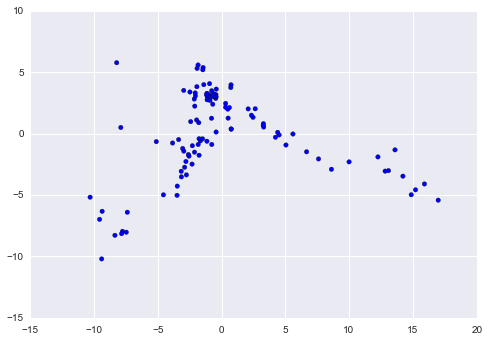

In [6]:
# plot the Isomap data (after reducing to 2 dimensions)
plt.scatter(iso_projected[:, 0], iso_projected[:, 1]);

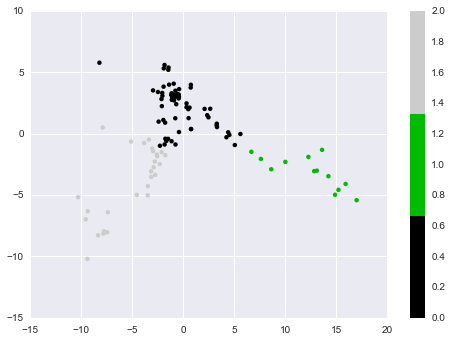

In [7]:
# the above scatterplot appears to have a center cluster, and two arms
# therefore, we will split this projected data into 3 groups
from sklearn.cluster import KMeans
est = KMeans(3)  # 3 clusters
est.fit(iso_projected)
iso_kmeans = est.predict(iso_projected)

plt.scatter(iso_projected[:, 0], iso_projected[:, 1], c=iso_kmeans, cmap=plt.cm.get_cmap('nipy_spectral', 3), edgecolor='none');
plt.colorbar();

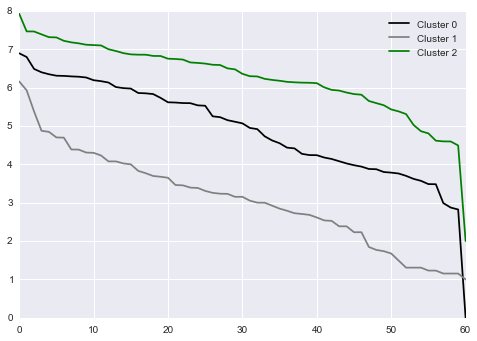

In [8]:
# inspect these 3 groups to determine their likes & dislikes
scores_fill['iso_kmeans']= pd.Series(iso_kmeans)
scores_cluster0 = scores_fill[scores_fill['iso_kmeans'] == 0].mean()
scores_cluster1 = scores_fill[scores_fill['iso_kmeans'] == 1].mean()
scores_cluster2 = scores_fill[scores_fill['iso_kmeans'] == 2].mean()
scores_cluster0.sort(ascending=0)
scores_cluster1.sort(ascending=0)
scores_cluster2.sort(ascending=0)

# Cluster 0 Voted averagely
# Cluster 1 Voted lower than average
# Cluster 2 Voted higher than average
plt.plot(scores_cluster0, 'black', label="Cluster 0");
plt.plot(scores_cluster1, 'grey', label="Cluster 1");
plt.plot(scores_cluster2, 'green', label="Cluster 2");
plt.legend();

---

### Cluster 0 (black)

Likes: Type Theory, Haskell, Pure Functional Programming (PFP)

Dislikes: Scala, Clojure, Erlang

In [9]:
scores_cluster0.head(15) # Likes

Type Theory and its Meaning Explanations                                        6.895238
Parametricity: The Essence of Information Hiding                                6.797980
Purely-Functional Web Apps using React and PureScript                           6.487301
The Next Great Functional Programming Language                                  6.399666
Introduction to Intuitionistic Type Theory                                      6.348941
Fault-Tolerance on the Cheap: Making Systems That (Probably) Won't Fall Over    6.310742
Pattern Functors: Wandering Around Fix-points, Free Monads and Generics         6.305485
Give me Freedom or Forgeddaboutit: What Does "Free" Really Mean?                6.292868
Selfish Purity: How Functional Programming Makes Every-Day Jobs Easier          6.284314
How to Learn Haskell in Less Than 5 Years                                       6.264247
Programming and Math                                                            6.193331
Introduction to Haske

In [10]:
scores_cluster0.tail(15) # Dislikes

Scalaz 102 - Level Up Your Scalaz Foo!                                             3.941034
A Skeptic's Look at Scalaz "Gateway Drugs": A Practical Exploration                3.879511
Introduction to Clojure: The Programming Language You've Been Longing For          3.873188
Computation Expressions in Scala                                                   3.800197
The Meaning of LFE                                                                 3.784348
Idiomatic Scala: Your Options Do Not Match                                         3.761159
Clojure vs Design Patterns                                                         3.699915
Axle: A Spire-based DSL                                                            3.621739
Make Up Your Own: "Hello World!"                                                   3.570487
What's New in Scala                                                                3.484960
A Bird's Eye View of ClojureScript                                              

---

### Cluster 1 (grey)

Likes: Logic Programming !!, Erlang, Clojure, a bit of Haskell

Dislikes: Scala, Emerging/Theoretical PFP

Notes:  Voted lower than average as a whole

In [11]:
scores_cluster1.head(15) # Likes

Introduction to Constraint Logic Programming                                 6.161388
An Introduction to Rust: Or, "Who Got Types in My Systems Programming!"      5.930545
Write Some Idris                                                             5.376766
Introduction to Erlang                                                       4.875385
The Next Great Functional Programming Language                               4.846154
Modeling Data in Haskell for Beginners                                       4.701727
Purely-Functional Web Apps using React and PureScript                        4.696116
A Practical Introduction to Haskell GADTs                                    4.387692
Clojure vs Design Patterns                                                   4.384615
Type Theory and its Meaning Explanations                                     4.307692
Introduction to Clojure: The Programming Language You've Been Longing For    4.300000
How to Learn Haskell in Less Than 5 Years             

In [12]:
scores_cluster1.tail(15) # Dislikes

Shipping a Production Web App in Elm                                               2.230769
Reactive Programming with Algebra                                                  1.846154
Programs as Values: Pure Composable Database Access in Scala                       1.769231
Scalaz-Streams: A Functional Approach to Compositional, Streaming I/O              1.736686
Finally Tagless DSLs and MTL                                                       1.675991
Freya (F#) for HTTP Systems                                                        1.491673
Scalaz 102 - Level Up Your Scalaz Foo!                                             1.307692
Axle: A Spire-based DSL                                                            1.307692
What's New in Scala                                                                1.307692
Building Concurrent, Fault-Tolerant, Scalable Applications in F# using Akka.Net    1.230769
Computation Expressions in Scala                                                

---

### Cluster 2 (green)

Likes: Reactive Programming, Practical/Introductory Haskell

Dislikes: Experimental, Emerging, Advanced topics

Notes: Voted higher than average as a whole, tail is quite high still - not much differentiation between likes and dislikes?

In [13]:
scores_cluster2.head(15)

How to Learn Haskell in Less Than 5 Years                                  7.924757
Purely-Functional Web Apps using React and PureScript                      7.466054
Selfish Purity: How Functional Programming Makes Every-Day Jobs Easier     7.463235
Monads - Asking the Right Question                                         7.388167
Developing Web Applications with Haskell                                   7.315064
Pattern Functors: Wandering Around Fix-points, Free Monads and Generics    7.308824
Make Your Own Programming Language!                                        7.220180
An Introduction to Rust: Or, "Who Got Types in My Systems Programming!"    7.180305
HTTP through Functional Programming                                        7.154533
Introduction to Haskell with a focus on High-Performance Computing         7.118347
Introduction to Constraint Logic Programming                               7.108894
The Next Great Functional Programming Language                             7

In [14]:
scores_cluster2.tail(15)

What's New in Scala                                                                5.815027
Make Up Your Own: "Hello World!"                                                   5.651515
Idiomatic Scala: Your Options Do Not Match                                         5.595714
Finally Tagless DSLs and MTL                                                       5.541126
The Meaning of LFE                                                                 5.431429
Introducing Emily: Simplifying Functional Programming                              5.380000
A Skeptic's Look at Scalaz "Gateway Drugs": A Practical Exploration                5.310224
Building Concurrent, Fault-Tolerant, Scalable Applications in F# using Akka.Net    5.028011
Conversation 201: What Stuttering Can Teach You About Talking to Humans            4.863703
Axle: A Spire-based DSL                                                            4.807143
Introduction to Typed Racket                                                    

--- 

## * Popularity

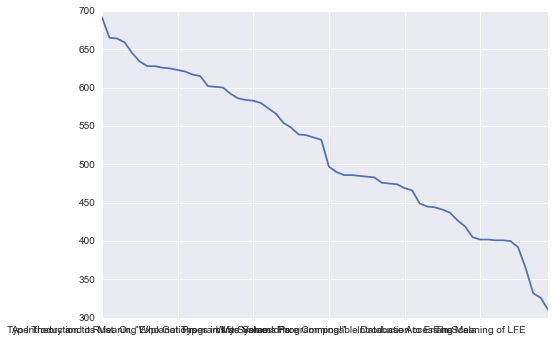

In [15]:
scores_colsum = scores.sum(axis=0);
scores_colsum.sort(ascending=0);
scores_colsum.plot();
# plot of talk popularity scores

In [16]:
top_scores = scores_colsum.head(15);
top_scores # top 15 talks

Type Theory and its Meaning Explanations                                        692
The Next Great Functional Programming Language                                  665
How to Learn Haskell in Less Than 5 Years                                       664
Purely-Functional Web Apps using React and PureScript                           659
Selfish Purity: How Functional Programming Makes Every-Day Jobs Easier          645
Pattern Functors: Wandering Around Fix-points, Free Monads and Generics         634
Introduction to Haskell with a focus on High-Performance Computing              628
Parametricity: The Essence of Information Hiding                                628
Introduction to Intuitionistic Type Theory                                      626
Programming and Math                                                            625
An Introduction to Rust: Or, "Who Got Types in My Systems Programming!"         623
Fault-Tolerance on the Cheap: Making Systems That (Probably) Won't Fall Over

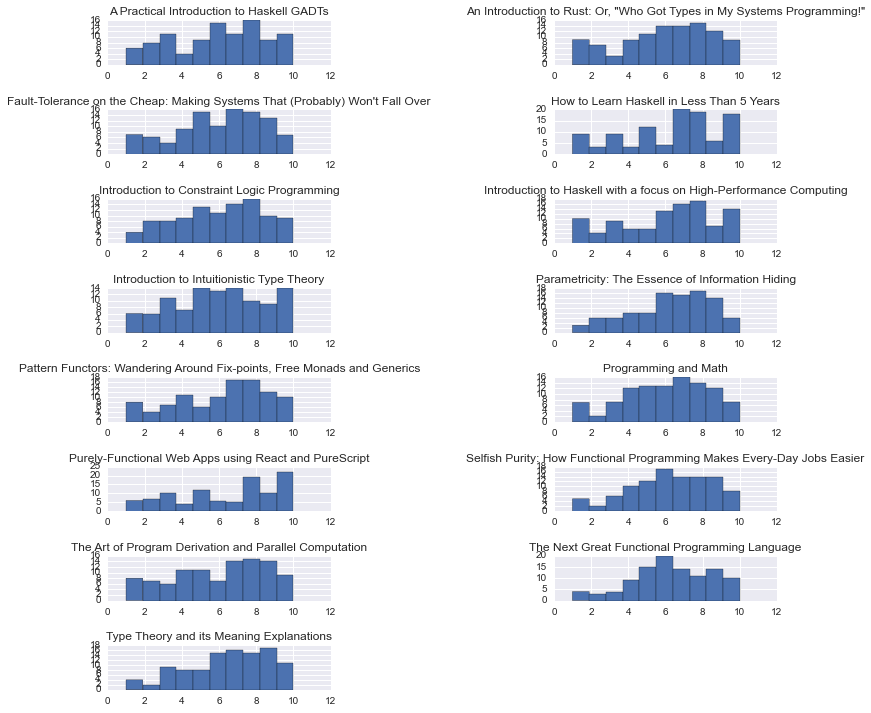

In [17]:
# histograms of top talks show they have a somewhat have a median score closer to the middle  
scores.hist(column=top_scores.keys(),figsize=(12,12),layout=(8,2));
fig = plt.gcf(); fig.subplots_adjust(wspace=1, hspace=1);

In [18]:
bottom_scores = scores_colsum.tail(15)
bottom_scores # bottom 15 talks

Clojure vs Design Patterns                                                         441
Computation Expressions in Scala                                                   437
Scalaz 102 - Level Up Your Scalaz Foo!                                             427
A Bird's Eye View of ClojureScript                                                 419
What's New in Scala                                                                405
The Meaning of LFE                                                                 402
Make Up Your Own: "Hello World!"                                                   402
Introduction to Typed Racket                                                       401
Conversation 201: What Stuttering Can Teach You About Talking to Humans            401
A Skeptic's Look at Scalaz "Gateway Drugs": A Practical Exploration                400
Idiomatic Scala: Your Options Do Not Match                                         392
Axle: A Spire-based DSL                    

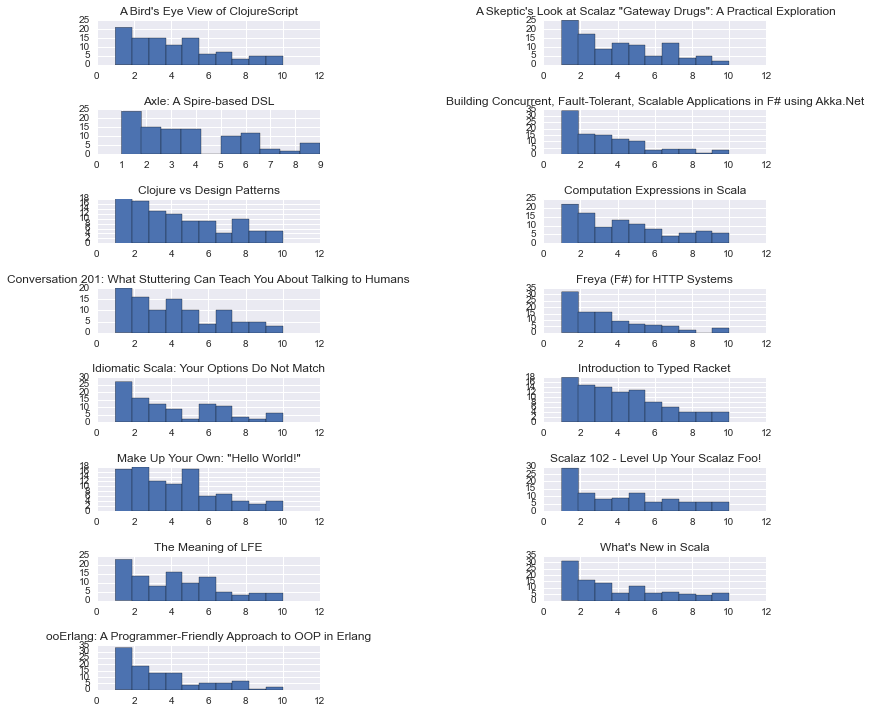

In [19]:
# histogram of bottom talks show mostly agreement about bottom status
# Scala and F# appeared more frequently in the bottom talks 

scores.hist(column=bottom_scores.keys(),figsize=(12,12),layout=(8,2));
fig = plt.gcf(); fig.subplots_adjust(wspace=1, hspace=1);

---

### Sponsors

In [20]:
# Set sponsor labels to 0 or 1

survey_sponsors = pd.get_dummies(survey[["SlamData","VictorOps","Keen IO", "BoldRadius", "Elemica"]], prefix='D');

In [24]:
for c in survey_sponsors:
  print "\n**** {0} ****".format(c)
  cov_score = scores[survey_sponsors[c] == 1].mean().cov(
              scores[survey_sponsors[c] == 0].mean())
  print "covariance vs. rest: {0}".format(cov_score)


**** D_SlamData ****
covariance vs. rest: 0.764662677577

**** D_VictorOps ****
covariance vs. rest: 0.809565965853

**** D_Keen IO ****
covariance vs. rest: 0.770580611696

**** D_BoldRadius ****
covariance vs. rest: 0.644291576159

**** D_Elemica ****
covariance vs. rest: 0.982959241901


In [25]:
# with a covariance score of 0.64, selection of BoldRadius appears to be more distinctive
# than not selecting BoldRadius compared to the rest on the survey
boldradius_scores = scores[survey_sponsors["D_BoldRadius"] == 1].mean()
boldradius_scores.sort(ascending=0)
print "**** D_BoldRadius mean scores ****"
boldradius_scores.head(15)

# selection of boldradius indicates a higher preference for scala talks

**** D_BoldRadius mean scores ****


Type Theory and its Meaning Explanations                                   8.272727
Programs as Values: Pure Composable Database Access in Scala               8.000000
Scalaz-Streams: A Functional Approach to Compositional, Streaming I/O      7.727273
The Abstract Method, In General                                            7.636364
Parametricity: The Essence of Information Hiding                           7.272727
Computation Expressions in Scala                                           7.272727
Cats - A Fresh Look at Functional Programming in Scala                     7.181818
Why I Like Functional Programming                                          7.181818
Pattern Functors: Wandering Around Fix-points, Free Monads and Generics    7.090909
Scalaz 102 - Level Up Your Scalaz Foo!                                     7.090909
The Next Great Functional Programming Language                             7.090909
Selfish Purity: How Functional Programming Makes Every-Day Jobs Easier     7